In [3]:
import requests
import json
import urllib3
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta as timedelta

In [4]:
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# Get Access token from refresh token

In [5]:
auth_url = 'https://www.strava.com/oauth/token'
activities_url = 'https://www.strava.com/api/v3/athlete/activities'

payload = {
    'client_id': '61192', 
    'client_secret': '2c4d071cbe331679dba8dd98ca5737807c649bd5',
    'refresh_token': '064486d45898df2990c369aa127472fce092912e',
    'grant_type': "refresh_token",
    'f': 'json'
}

print('Requesting token...\n')

res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']

print(f'Access token = {access_token}')

header = {'Authorization': 'Bearer ' + f'{access_token}'}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activities_url, headers=header, params=param).json()

print(my_dataset[0])

Requesting token...

Access token = e76413de59348ad8122518a2d3907745a7db6344
{'resource_state': 2, 'athlete': {'id': 29242296, 'resource_state': 1}, 'name': '-5 deg', 'distance': 6383.4, 'moving_time': 1840, 'elapsed_time': 1885, 'total_elevation_gain': 99.0, 'type': 'Run', 'workout_type': 0, 'id': 4768850315, 'external_id': 'garmin_push_6253737529', 'upload_id': 5089399121, 'start_date': '2021-02-11T06:47:25Z', 'start_date_local': '2021-02-11T06:47:25Z', 'timezone': '(GMT+00:00) Europe/London', 'utc_offset': 0.0, 'start_latlng': [51.641032, -0.721327], 'end_latlng': [51.641012, -0.72136], 'location_city': None, 'location_state': None, 'location_country': 'United Kingdom', 'start_latitude': 51.641032, 'start_longitude': -0.721327, 'achievement_count': 1, 'kudos_count': 11, 'comment_count': 1, 'athlete_count': 1, 'photo_count': 0, 'map': {'id': 'a4768850315', 'summary_polyline': 'mcezHh{kCCd@GN^dCANoAlAg@j@[n@cAvCQx@e@fB]bAaAnDm@bCk@rAkApB}@fB{A~B_AdBiAvA_@VEAMKm@yAg@aAYu@iA}DO{@KyC@mCG

In [6]:
activities = pd.json_normalize(my_dataset)

In [8]:
cols = ['name', 'upload_id', 'type', 'distance', 'moving_time',   
         'average_speed', 'max_speed', 'average_cadence',
        'total_elevation_gain','average_heartrate', 'max_heartrate', 
        'start_date_local',
       ]

activities = activities[cols]
activities.head(3)

,name,upload_id,type,distance,moving_time,average_speed,max_speed,average_cadence,total_elevation_gain,average_heartrate,max_heartrate,start_date_local
0,-5 deg,5.089399e+09,Run,6383.4,1840,3.469,4.8,83.7,99.0,158.1,187.0,2021-02-11T06:47:25Z
1,Calm,5.078650e+09,Run,6649.3,1913,3.476,4.9,83.3,56.0,167.1,178.0,2021-02-09T06:56:57Z
2,Top park tempo,5.069548e+09,Run,6655.0,1878,3.544,4.5,83.4,61.0,161.0,184.0,2021-02-07T12:09:29Z


In [9]:
activities['start_date_local'] = pd.to_datetime(activities['start_date_local'])
activities['start_time'] = activities['start_date_local'].dt.time
activities['start_date_local'] = activities['start_date_local'].dt.date

In [10]:
activities.head(3)

,name,upload_id,type,distance,moving_time,average_speed,max_speed,average_cadence,total_elevation_gain,average_heartrate,max_heartrate,start_date_local,start_time
0,-5 deg,5.089399e+09,Run,6383.4,1840,3.469,4.8,83.7,99.0,158.1,187.0,2021-02-11,06:47:25
1,Calm,5.078650e+09,Run,6649.3,1913,3.476,4.9,83.3,56.0,167.1,178.0,2021-02-09,06:56:57
2,Top park tempo,5.069548e+09,Run,6655.0,1878,3.544,4.5,83.4,61.0,161.0,184.0,2021-02-07,12:09:29


In [11]:
runs = activities.loc[activities['type'] == 'Run']

In [12]:
runs.head(10)

,name,upload_id,type,distance,moving_time,average_speed,max_speed,average_cadence,total_elevation_gain,average_heartrate,max_heartrate,start_date_local,start_time
0,-5 deg,5.089399e+09,Run,6383.4,1840,3.469,4.8,83.7,99.0,158.1,187.0,2021-02-11,06:47:25
1,Calm,5.078650e+09,Run,6649.3,1913,3.476,4.9,83.3,56.0,167.1,178.0,2021-02-09,06:56:57
2,Top park tempo,5.069548e+09,Run,6655.0,1878,3.544,4.5,83.4,61.0,161.0,184.0,2021-02-07,12:09:29
3,Famiglia,5.069266e+09,Run,4255.6,1834,2.320,3.9,79.3,29.0,159.3,177.0,2021-02-07,11:33:45
4,Manlike moon,5.056226e+09,Run,6297.4,1811,3.477,5.6,83.0,91.0,153.7,173.0,2021-02-05,06:52:27
5,Soundd,5.044836e+09,Run,7018.1,2029,3.459,6.0,82.3,90.0,144.8,161.0,2021-02-03,06:47:14
6,Fresh,5.033789e+09,Run,6259.2,1761,3.554,5.5,83.6,79.0,152.2,171.0,2021-02-01,06:58:48
7,Afternoon yomp,5.024607e+09,Run,6369.0,1793,3.552,6.6,82.9,93.0,133.7,158.0,2021-01-30,16:26:58
8,Morning Run,5.005370e+09,Run,6329.6,1813,3.491,5.6,82.3,87.0,151.9,171.0,2021-01-27,06:57:59
9,Fuego,4.985495e+09,Run,9080.6,2608,3.482,5.8,83.1,128.0,159.2,185.0,2021-01-23,15:51:10


In [13]:
len(runs)

155

In [14]:
runs['pace_in_sec'] = round(1000 / runs['average_speed'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [201]:
runs['average_pace'] = pd.to_timedelta(runs['pace_in_sec'], unit='s')

In [204]:
runs.head()

,name,upload_id,type,distance,moving_time,average_speed,max_speed,average_cadence,total_elevation_gain,average_heartrate,max_heartrate,start_date_local,start_time,pace_in_sec,average_pace
0,-5 deg,5.089399e+09,Run,6383.4,1840,3.469,4.8,83.7,99.0,158.1,187.0,2021-02-11,06:47:25,288.0,00:04:48
1,Calm,5.078650e+09,Run,6649.3,1913,3.476,4.9,83.3,56.0,167.1,178.0,2021-02-09,06:56:57,288.0,00:04:48
2,Top park tempo,5.069548e+09,Run,6655.0,1878,3.544,4.5,83.4,61.0,161.0,184.0,2021-02-07,12:09:29,282.0,00:04:42
3,Famiglia,5.069266e+09,Run,4255.6,1834,2.320,3.9,79.3,29.0,159.3,177.0,2021-02-07,11:33:45,431.0,00:07:11
4,Manlike moon,5.056226e+09,Run,6297.4,1811,3.477,5.6,83.0,91.0,153.7,173.0,2021-02-05,06:52:27,288.0,00:04:48


# Metrics

### - vo2 max

In [64]:
import math

In [101]:
run = 5

In [102]:
time = runs.iloc[run]['moving_time'] / 60 # minutes
distance = runs.iloc[run]['distance'] # meters
velocity = distance/time # meters / min

In [103]:
percent_max = 0.8 + (0.1894393 * math.exp(-0.012778 * time)) + (0.2989558 * math.exp(-0.1932605 * time))

In [104]:
vo2 = -4.60 + (0.182258 * velocity) + (0.000104 * (velocity ** 2))

In [105]:
vo2max = vo2 / percent_max

In [106]:
print(f'percentage of your vo2max: {percent_max}')
print(f'vo2: {vo2}')
print(f'vo2max: {vo2max}')

percentage of your vo2max: 0.9234061380712845
vo2: 37.703995336870186
vo2max: 40.83143243516055


In [135]:
for run in range(5):
    time = runs.iloc[run]['moving_time'] / 3600 # hours
    distance = runs.iloc[run]['distance'] / 1000 # km
    velocity = distance/time # km / hour
    tsor_vo2max = 3.77 * velocity
    print(tsor_vo2max)

47.084513478260874
47.17422875065343
48.094600638977646
31.49236815703381
47.19398829376035


### - riegel's race predictor - for last 5 runs

In [110]:
d1 = 21.3
t1 = 90
d2 = 5

In [112]:
t2 = t1 * ((d2 / d1) ** 1.06)
t2

19.36726675682383

# Plots

In [149]:
from matplotlib import ticker

Text(0.5, 1.0, 'Avg Pace vs Distance')

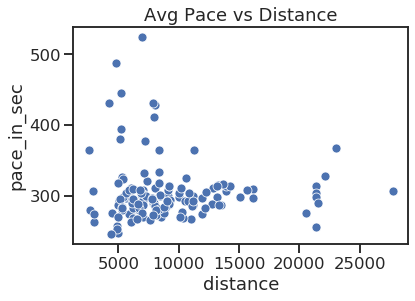

In [118]:
sns.set(style="ticks", context="talk")
sns.scatterplot(x='distance', y='pace_in_sec', data = runs).set_title("Avg Pace vs Distance")

In [158]:
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [160]:
def pace_plot(x, pos):
    m = int(x / 60)
    s = int(x - (60 * m))
    return '%(m)01d:%(s)02d' % {'m': m, 's': s}

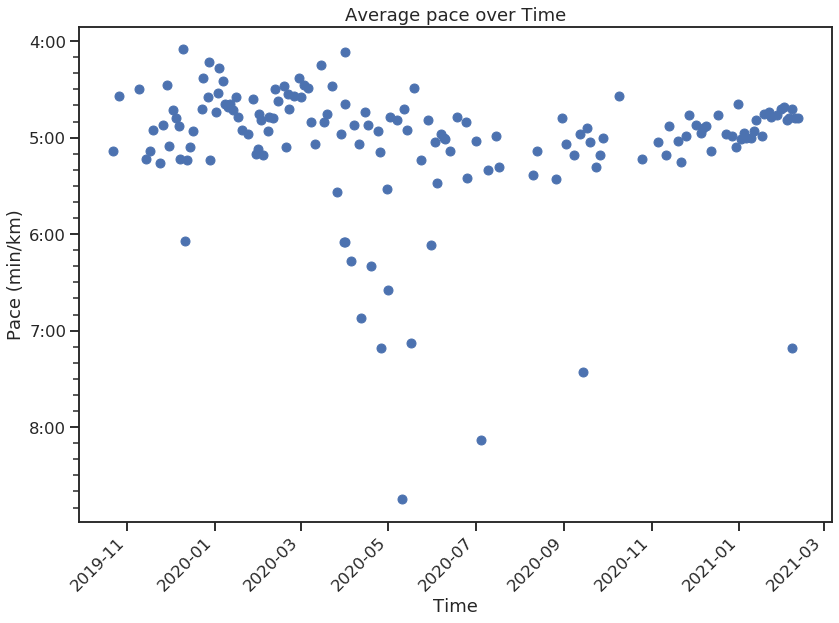

In [179]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
x = np.asarray(runs.start_date_local)
y = np.asarray(runs.pace_in_sec)
ax.plot_date(x, y)
ax.set(title='Average pace over Time',
      ylabel='Pace (min/km)',
      xlabel='Time')

ax.invert_yaxis()
ax.yaxis.set_major_formatter(FuncFormatter(pace_plot))
ax.yaxis.set_major_locator(MultipleLocator(60))
ax.yaxis.set_minor_locator(MultipleLocator(10))

fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

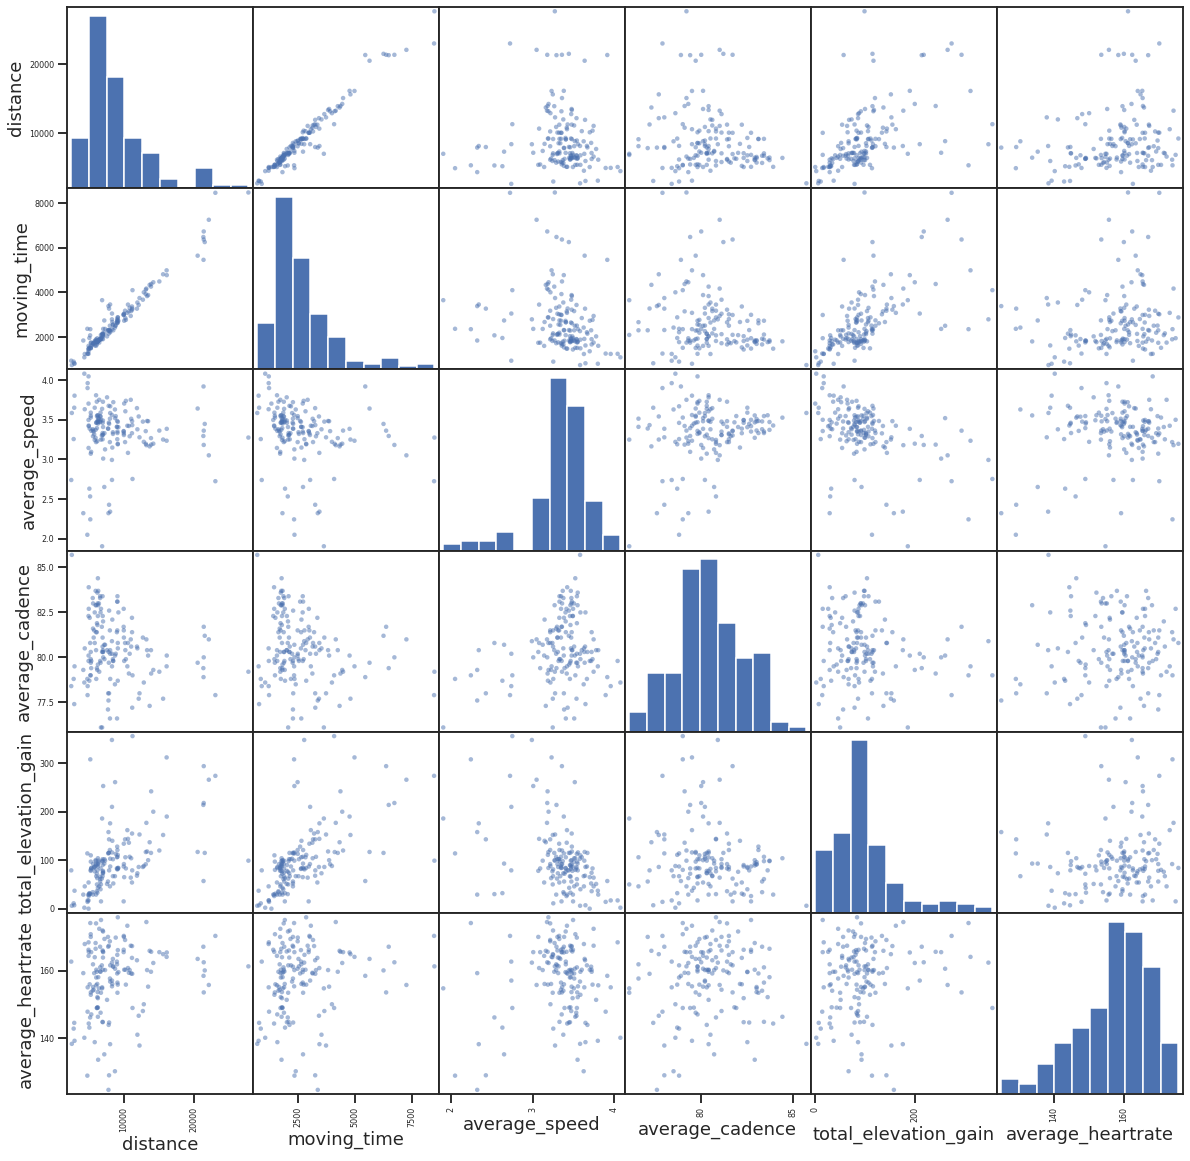

In [210]:
from pandas.plotting import scatter_matrix
attributes = ["distance", 'moving_time', 'average_speed', 'average_cadence', 'total_elevation_gain',
             'average_heartrate']
scatter_matrix(runs[attributes], figsize=(20, 20));